In [1]:
!ls

closest_strategy_data.csv  sdn_strategy_closest.py	   Untitled.ipynb
edc_report.csv		   sdn_strategy_closest_txt_v1.py


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns

In [25]:
df = pd.read_csv('closest_strategy_data.csv', delimiter=";")

In [26]:
df

,ap_id,edc_id_0,edc_location_0,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,edc_id_1,edc_location_1,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,edc_id_2,edc_location_2,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,369.133502,1133.652453,1320.622651,edc_1
1,ap_1,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,400.047844,1700.704329,2060.252671,edc_2
2,ap_2,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,613.067125,1184.287126,1329.256048,edc_0
3,ap_3,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,627.531664,1159.676551,1899.352437,edc_2
4,ap_4,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,ap_6,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,685.185692,1069.088510,2186.212050,edc_0
2141,ap_7,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,400.383513,1191.755001,1667.910912,edc_1
2142,ap_8,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,423.268899,1407.665266,1984.784647,edc_0
2143,ap_9,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,573.842145,780.349062,1020.882641,edc_1


In [27]:
df.action.value_counts()

edc_1    780
edc_0    780
edc_2    585
Name: action, dtype: int64

In [19]:
df.dtypes

ap_id                   object
edc_id_0                object
edc_location_0          object
overall_std_u_0        float64
max_std_u_0              int64
pue_0                  float64
power_demand_0         float64
power_consumption_0    float64
it_power_0             float64
cooling_power_0          int64
power_generation_0       int64
charging_power_0         int64
energy_stored_0        float64
energy_capacity_0        int64
edc_id_1                object
edc_location_1          object
overall_std_u_1        float64
max_std_u_1              int64
pue_1                  float64
power_demand_1         float64
power_consumption_1    float64
it_power_1             float64
cooling_power_1          int64
power_generation_1       int64
charging_power_1         int64
energy_stored_1        float64
energy_capacity_1        int64
edc_id_2                object
edc_location_2          object
overall_std_u_2        float64
max_std_u_2              int64
pue_2                  float64
power_de

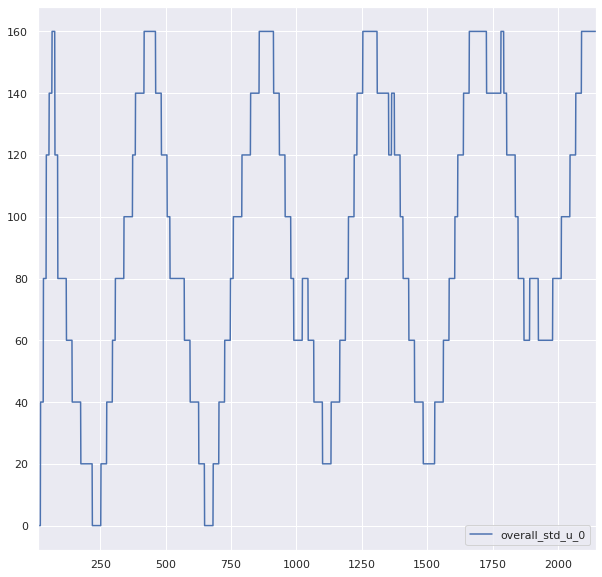

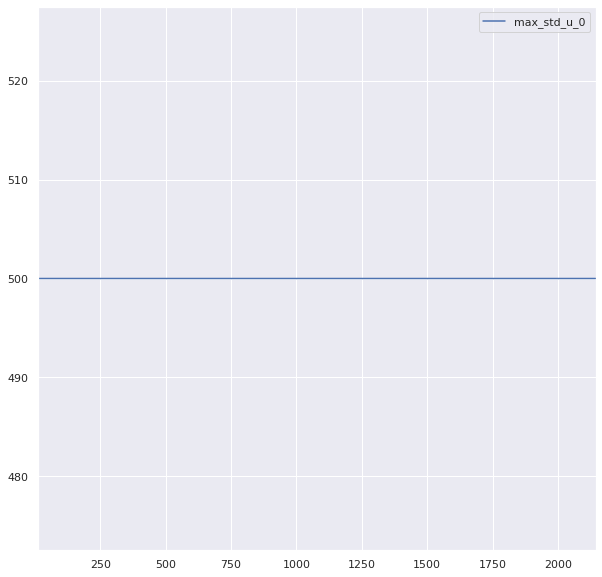

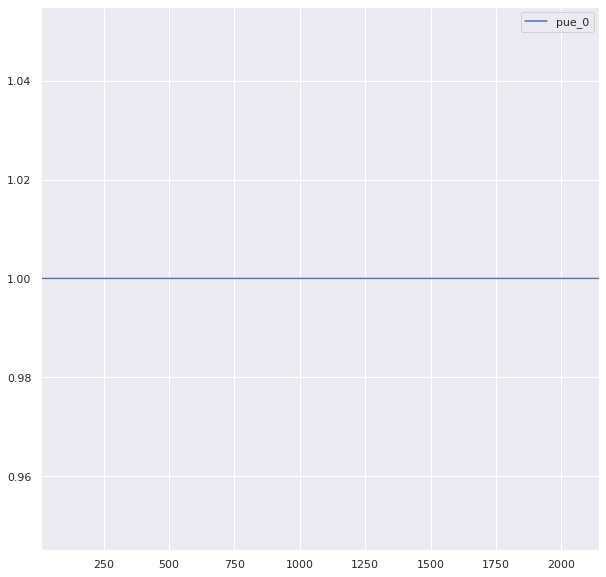

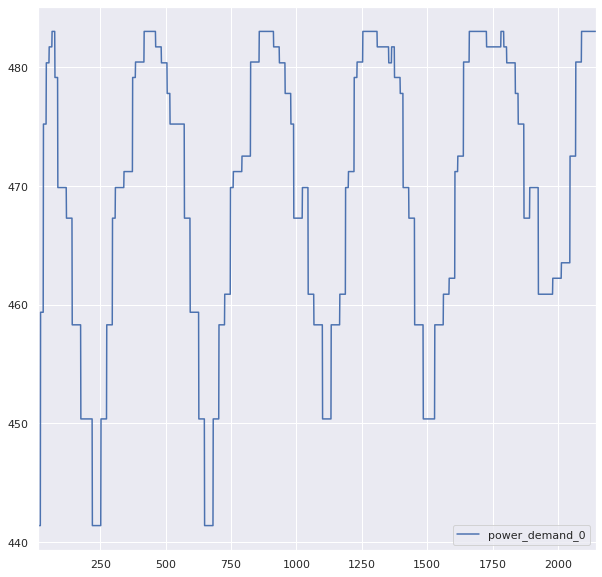

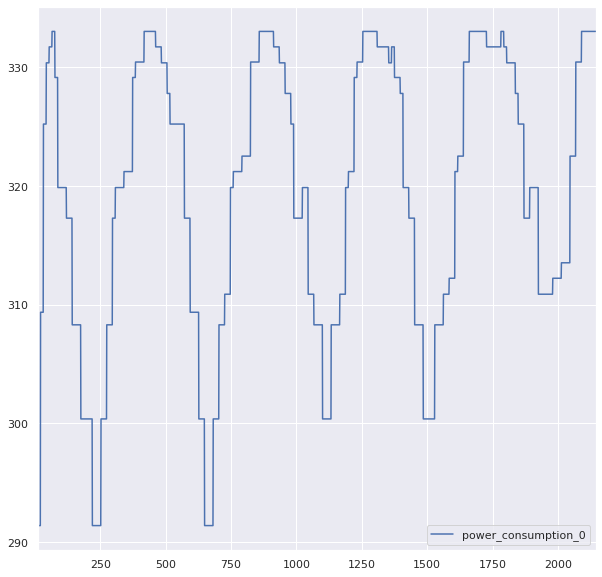

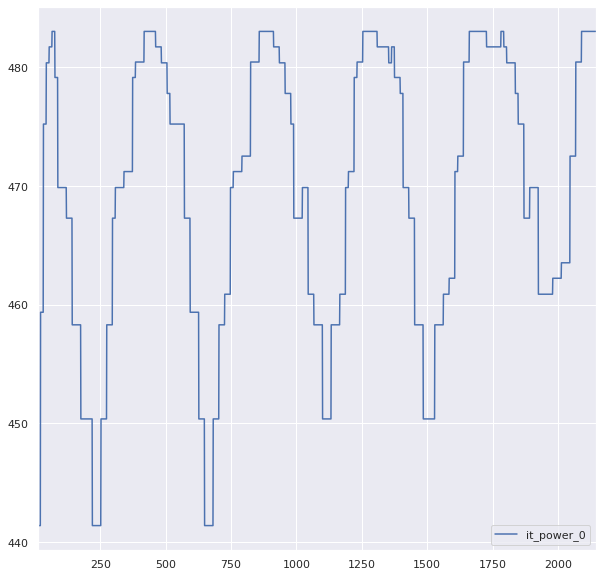

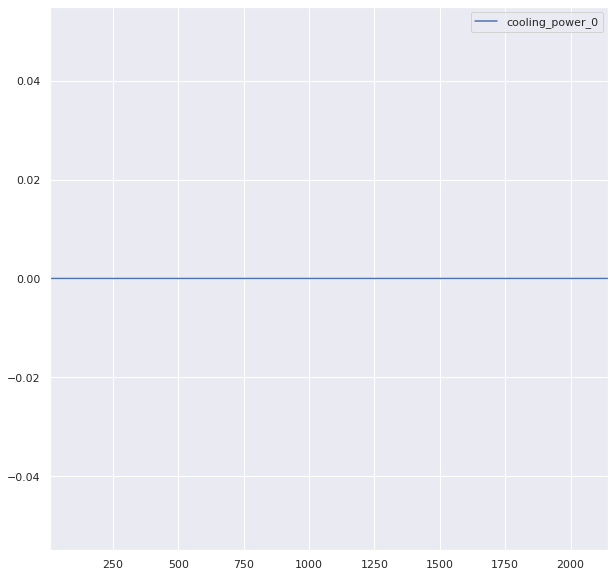

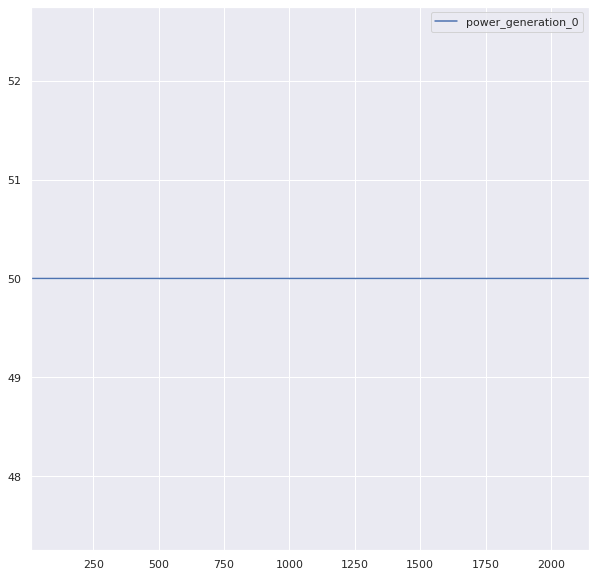

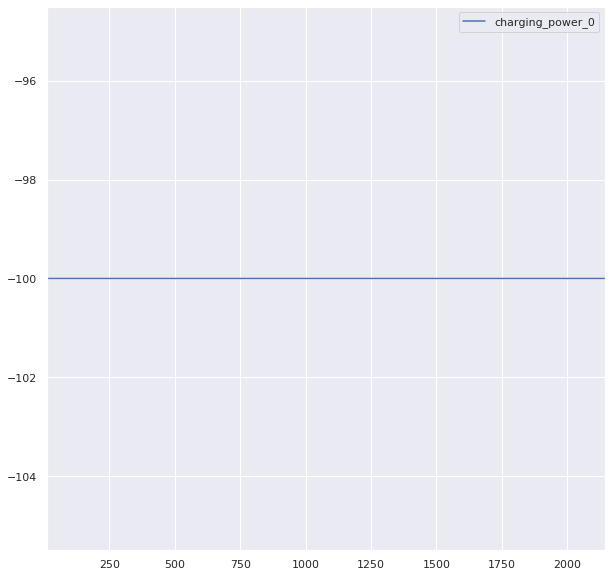

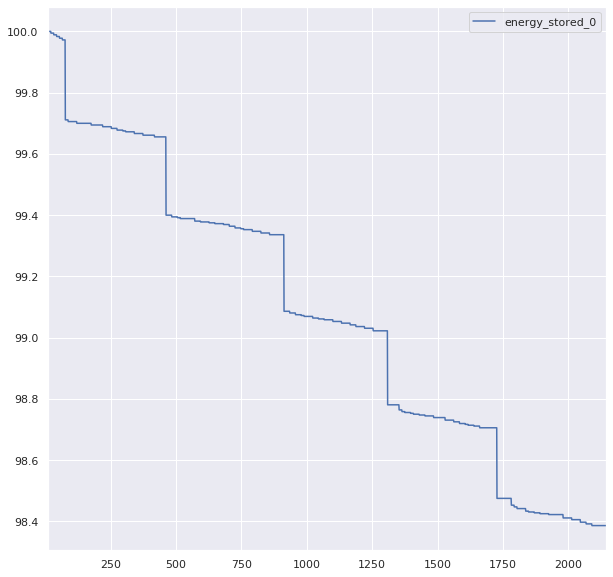

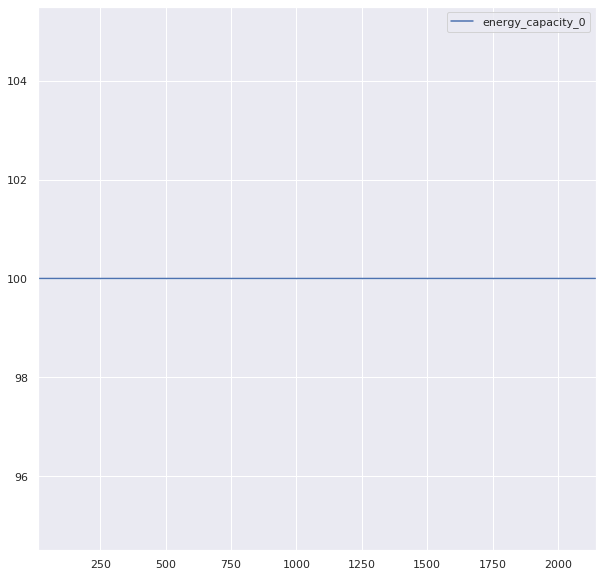

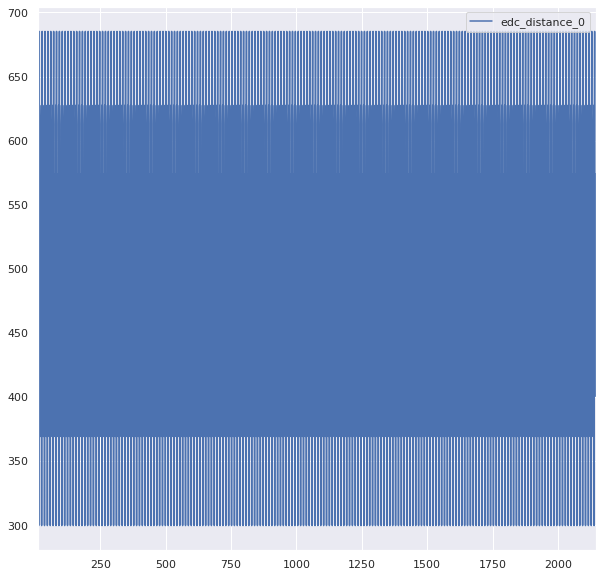

In [40]:
df_0 = df.iloc[11:,] # copy() # [df.ap_id=="ap_0"]
df_0_0 = df_0[[col for col in df_0.columns if "_0" in col]]
for col in df_0_0.select_dtypes(include=np.number).columns:
    df_0_0.plot(y=col)

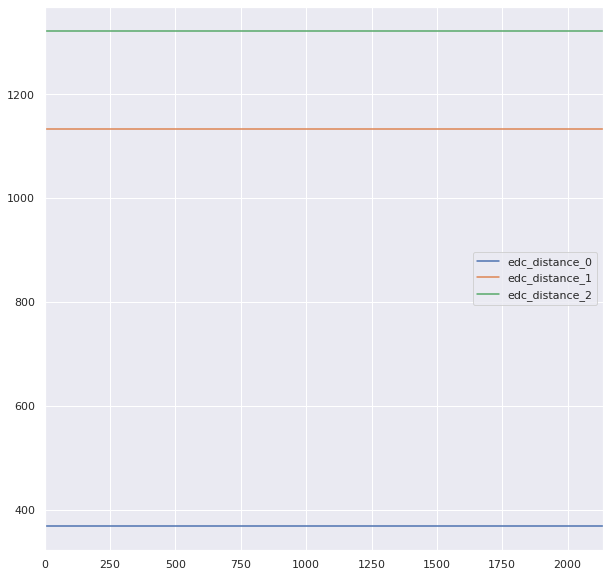

In [21]:
sns.set()
plt.rcParams['figure.figsize']=(10,10)
df_0.plot(y=[col for col in df.columns if "edc_distance" in col])

Important columns:
- overall_std_u_0, overall_std_u_1, overal_std_u_2 -> scale to max_std_u_(0,1,2)
- power_consumption_0, power_consumption_1, power_consumption_2 -> min_max w/o firt timestamp (for now)
- edc_distance_0, edc_distance_1, edc_distance_2 -> min_max w/o first timestamp 
- action -> label encoding

Possible columns
- power_demand_0, power_demand_1, power_demand_2
- it_power_0, it_power_1, it_power_2

In [38]:
df_tmp = df.iloc[11:].reset_index()
final_df = df_tmp[["overall_std_u_0", "overall_std_u_1", "overall_std_u_2",
               "max_std_u_0", "max_std_u_1", "max_std_u_2",
               "power_consumption_0", "power_consumption_1", "power_consumption_2",
               "edc_distance_0", "edc_distance_1", "edc_distance_2",
               "action"
               ]]

In [39]:
final_df

,overall_std_u_0,overall_std_u_1,overall_std_u_2,max_std_u_0,max_std_u_1,max_std_u_2,power_consumption_0,power_consumption_1,power_consumption_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,0,0,0,500,500,500,291.393776,291.393776,291.393776,369.133502,1133.652453,1320.622651,edc_1
1,0,0,0,500,500,500,291.393776,291.393776,291.393776,400.047844,1700.704329,2060.252671,edc_2
2,0,0,0,500,500,500,291.393776,291.393776,291.393776,613.067125,1184.287126,1329.256048,edc_0
3,0,0,0,500,500,500,291.393776,291.393776,291.393776,627.531664,1159.676551,1899.352437,edc_2
4,0,0,0,500,500,500,291.393776,291.393776,291.393776,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,160,260,80,500,500,500,333.025635,355.165321,312.230827,685.185692,1069.088510,2186.212050,edc_0
2130,160,260,80,500,500,500,333.025635,355.165321,312.230827,400.383513,1191.755001,1667.910912,edc_1
2131,160,260,80,500,500,500,333.025635,355.165321,312.230827,423.268899,1407.665266,1984.784647,edc_0
2132,160,260,80,500,500,500,333.025635,355.165321,312.230827,573.842145,780.349062,1020.882641,edc_1


In [35]:
df

,ap_id,edc_id_0,edc_location_0,overall_std_u_0,max_std_u_0,pue_0,power_demand_0,power_consumption_0,it_power_0,cooling_power_0,power_generation_0,charging_power_0,energy_stored_0,energy_capacity_0,edc_id_1,edc_location_1,overall_std_u_1,max_std_u_1,pue_1,power_demand_1,power_consumption_1,it_power_1,cooling_power_1,power_generation_1,charging_power_1,energy_stored_1,energy_capacity_1,edc_id_2,edc_location_2,overall_std_u_2,max_std_u_2,pue_2,power_demand_2,power_consumption_2,it_power_2,cooling_power_2,power_generation_2,charging_power_2,energy_stored_2,energy_capacity_2,edc_distance_0,edc_distance_1,edc_distance_2,action
0,ap_0,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,369.133502,1133.652453,1320.622651,edc_1
1,ap_1,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,400.047844,1700.704329,2060.252671,edc_2
2,ap_2,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,613.067125,1184.287126,1329.256048,edc_0
3,ap_3,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,627.531664,1159.676551,1899.352437,edc_2
4,ap_4,edc_0,"(950.6207, 777.7721)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_1,"(1639.6117, 1482.3435)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,edc_2,"(802.2772, 2478.5847)",0,500,0,0.000000,-50.000000,0.000000,0,50,0,100.000000,100,299.587171,686.840512,1512.449018,edc_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,ap_6,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,685.185692,1069.088510,2186.212050,edc_0
2141,ap_7,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,400.383513,1191.755001,1667.910912,edc_1
2142,ap_8,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,423.268899,1407.665266,1984.784647,edc_0
2143,ap_9,edc_0,"(950.6207, 777.7721)",160,500,1,483.025635,333.025635,483.025635,0,50,-100,98.386111,100,edc_1,"(1639.6117, 1482.3435)",260,500,1,505.165321,355.165321,505.165321,0,50,-100,98.372222,100,edc_2,"(802.2772, 2478.5847)",80,500,1,462.230827,312.230827,462.230827,0,50,-100,98.419444,100,573.842145,780.349062,1020.882641,edc_1
